## Практическое занятие - Метод опорных векторов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_blobs
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


## SVM

**1.** Сгенерируйте три случайные двумерные выборки для бинарной классификации (хотя бы по 400 точек в каждой):
- с линейно разделимыми классами;
- с хорошо разделимыми классами, но не линейно разделимыми;
- с плохо разделимыми классами.

Визуализируйте полученные выборки на плоскости.

Для генерации случайной выборки можно использовать функции из модуля [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

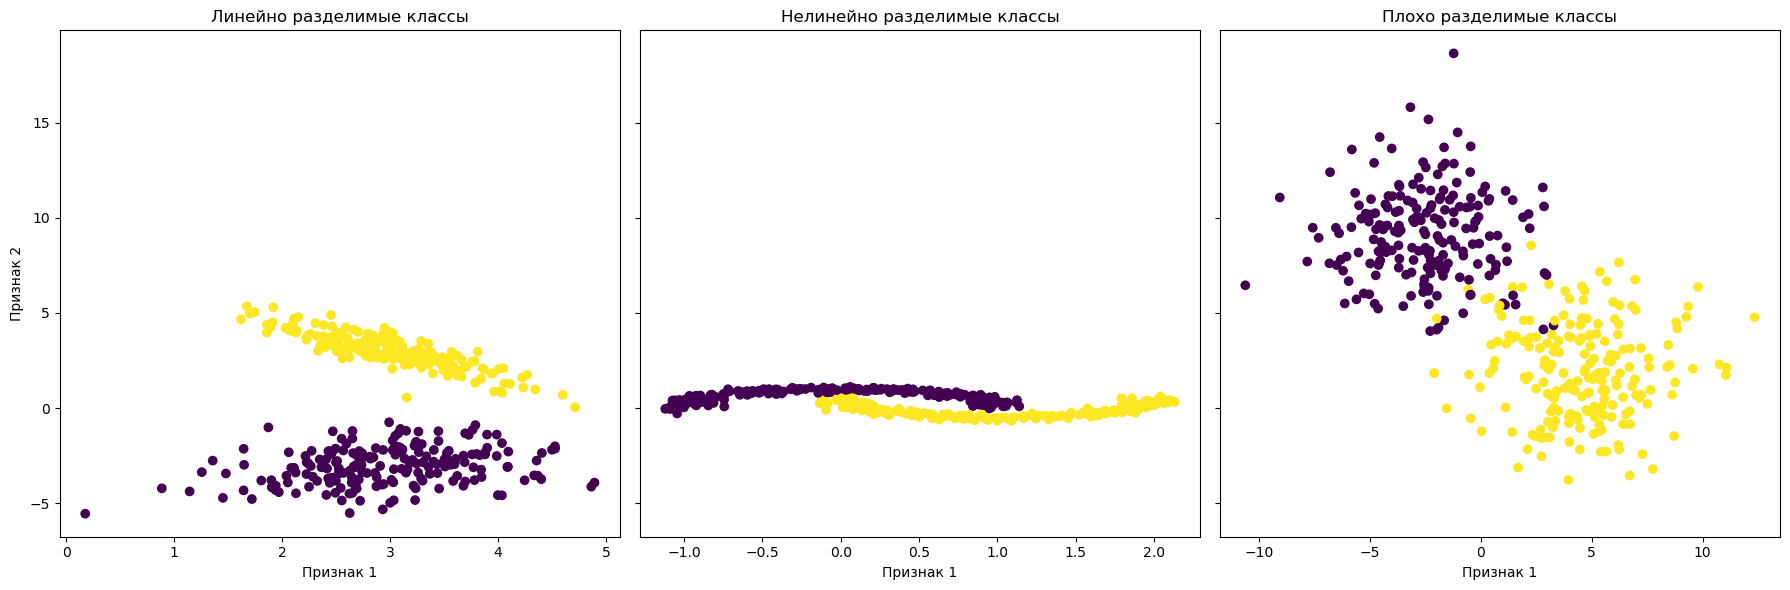

In [2]:
# 1. Линейно разделимые классы
X1, y1 = make_classification(
    n_samples=400,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=3.0,  # Коэффициент разделимости
    random_state=42
)

# 2. Хорошо разделимые, но нелинейные классы
X2, y2 = make_moons(n_samples=400, noise=0.08, random_state=42)

# 3. Плохо разделимые классы
X3, y3 = make_blobs(
    n_samples=400,
    centers=2,
    n_features=2,
    cluster_std=2.5,  # Высокий разброс точек
    random_state=42
)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Линейно разделимые
axes[0].scatter(X1[:, 0], X1[:, 1], c=y1)
axes[0].set_title("Линейно разделимые классы")
axes[0].set_xlabel("Признак 1")
axes[0].set_ylabel("Признак 2")

# Нелинейно разделимые
axes[1].scatter(X2[:, 0], X2[:, 1], c=y2)
axes[1].set_title("Нелинейно разделимые классы")
axes[1].set_xlabel("Признак 1")

# Плохо разделимые
axes[2].scatter(X3[:, 0], X3[:, 1], c=y3)
axes[2].set_title("Плохо разделимые классы")
axes[2].set_xlabel("Признак 1")

plt.tight_layout()
plt.show()


**2.** Обучите на сгенерированных ранее двумерных выборках [ядровой SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) с использованием следующих типов ядер (для различных значений гиперпараметра $C$):
- линейное: $K(x, z) = \langle x, z \rangle$;
- полиномиальное: $K(x, z) = (\gamma \langle x, z \rangle + 1)^d$ (для различных значений $\gamma, d$);
- гауссовское: $K(x, z) = \exp(-\gamma \|x - z\|^2)$ (для различных значений $\gamma$).

In [3]:
# Линейное ядро: K(x, z) = ⟨x, z⟩
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X1, y1)

# Предсказания
y_pred_linear = linear_svm.predict(X1)

# Оценка
print("Линейное ядро:")
print(classification_report(y1, y_pred_linear))

# Полиномиальное ядро: K(x, z) = (gamma * ⟨x, z⟩ + 1)^d
poly_svm = SVC(kernel='poly', degree=3, gamma=1.0, C=1.0, random_state=42)
poly_svm.fit(X2, y2)

# Предсказания
y_pred_poly = poly_svm.predict(X2)

# Оценка
print("Полиномиальное ядро:")
print(classification_report(y2, y_pred_poly))

# Гауссовское ядро: K(x, z) = exp(-gamma * ||x - z||^2)
rbf_svm = SVC(kernel='rbf', gamma=0.5, C=1.0, random_state=42)
rbf_svm.fit(X3, y3)

# Предсказания
y_pred_rbf = rbf_svm.predict(X3)

# Оценка
print("Гауссовское ядро:")
print(classification_report(y3, y_pred_rbf))


Линейное ядро:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       0.99      0.99      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Полиномиальное ядро:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       200
           1       0.87      0.99      0.93       200

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400

Гауссовское ядро:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       200
           1       0.97      0.98      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0

In [4]:

# Параметры регуляризации для перебора
C_values = [0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

# Перебор значений C для полиномиального ядра
print("Полиномиальное ядро:")
for C in C_values:
    poly_svm = SVC(kernel='poly', degree=3, gamma=1.0, C=C, random_state=42)
    poly_svm.fit(X2, y2)
    y_pred_poly = poly_svm.predict(X2)
    print(f"Параметр C = {C}")
    print(classification_report(y2, y_pred_poly))
    print("-" * 50)

# Перебор значений C для гауссовского ядра
print("Гауссовское ядро:")
for C in C_values:
    rbf_svm = SVC(kernel='rbf', gamma=0.5, C=C, random_state=42)
    rbf_svm.fit(X3, y3)
    y_pred_rbf = rbf_svm.predict(X3)
    print(f"Параметр C = {C}")
    print(classification_report(y3, y_pred_rbf))
    print("-" * 50)


Полиномиальное ядро:
Параметр C = 0.05
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       200
           1       0.86      0.78      0.82       200

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400

--------------------------------------------------
Параметр C = 0.1
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       200
           1       0.88      0.97      0.93       200

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400

--------------------------------------------------
Параметр C = 0.5
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       200
           1       0.87      0.99      0.93       200

    acc

**3.** Ответьте на следующие вопросы:
 - Как ведет себя SVM с полиномиальным ядром в зависимости от значений гиперпараметра $C$, степени ядра $d$ и параметра $\gamma$?
 - Как ведет себя SVM с гауссовским ядром в зависимости от значений гиперпараметра $C$ и $\gamma$?
 С учетом того, что увеличение параметра С улучшает показатели модели, говорить о отсутсвии переобучения 
    В целом тк мы работаем с одной выборкой давая модели больше обучиться на ней мы увеличиваем ее точность
   

In [5]:
# Диапазоны параметров
C_values = [0.05, 0.1, 1, 10, 100]  # Гиперпараметр регуляризации C
degree_values = [2, 3, 4,]  # Степень ядра d для полиномиального ядра
gamma_values = [0.1, 0.5, 1.0]  # Параметр gamma для полиномиального и гауссовского ядер

# Перебор параметров для SVM с полиномиальным ядром
print("\nПолиномиальное ядро:")
for C in C_values:
    for d in degree_values:
        for gamma in gamma_values:
            poly_svm = SVC(kernel='poly', degree=d, gamma=gamma, C=C, random_state=42)
            poly_svm.fit(X2, y2)
            y_pred_poly = poly_svm.predict(X2)
            print(f"C = {C}, Степень ядра d = {d}, Gamma = {gamma}")
            print(classification_report(y2, y_pred_poly))
            print("-" * 50)




Полиномиальное ядро:
C = 0.05, Степень ядра d = 2, Gamma = 0.1
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       200
           1       1.00      0.38      0.55       200

    accuracy                           0.69       400
   macro avg       0.81      0.69      0.65       400
weighted avg       0.81      0.69      0.65       400

--------------------------------------------------
C = 0.05, Степень ядра d = 2, Gamma = 0.5
              precision    recall  f1-score   support

           0       0.65      0.93      0.77       200
           1       0.87      0.51      0.64       200

    accuracy                           0.72       400
   macro avg       0.76      0.72      0.70       400
weighted avg       0.76      0.72      0.70       400

--------------------------------------------------
C = 0.05, Степень ядра d = 2, Gamma = 1.0
              precision    recall  f1-score   support

           0       0.65      0.67      0.

C = 1, Степень ядра d = 2, Gamma = 1.0
              precision    recall  f1-score   support

           0       0.93      0.62      0.75       200
           1       0.72      0.95      0.82       200

    accuracy                           0.79       400
   macro avg       0.83      0.79      0.78       400
weighted avg       0.83      0.79      0.78       400

--------------------------------------------------
C = 1, Степень ядра d = 3, Gamma = 0.1
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       200
           1       1.00      0.42      0.59       200

    accuracy                           0.71       400
   macro avg       0.82      0.71      0.68       400
weighted avg       0.82      0.71      0.68       400

--------------------------------------------------
C = 1, Степень ядра d = 3, Gamma = 0.5
              precision    recall  f1-score   support

           0       0.99      0.86      0.93       200
           1      

C = 100, Степень ядра d = 4, Gamma = 1.0
              precision    recall  f1-score   support

           0       0.99      0.61      0.76       200
           1       0.72      0.99      0.83       200

    accuracy                           0.80       400
   macro avg       0.86      0.80      0.79       400
weighted avg       0.86      0.80      0.79       400

--------------------------------------------------


In [6]:
# Перебор параметров для SVM с гауссовским ядром
C_values = [0.05, 0.1, 1, 10, 100]  # Гиперпараметр регуляризации C
gamma_values = [0.1, 0.5, 1.0]  # Параметр gamma для полиномиального и гауссовского ядер
print("\nГауссовское ядро:")
for C in C_values:
    for gamma in gamma_values:
        rbf_svm = SVC(kernel='rbf', gamma=gamma, C=C, random_state=42)
        rbf_svm.fit(X3, y3)
        y_pred_rbf = rbf_svm.predict(X3)
        print(f"C = {C}, Gamma = {gamma}")
        print(classification_report(y3, y_pred_rbf))
        print("-" * 50)


Гауссовское ядро:
C = 0.05, Gamma = 0.1
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       200
           1       0.96      0.97      0.97       200

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

--------------------------------------------------
C = 0.05, Gamma = 0.5
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       200
           1       0.95      0.98      0.97       200

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

--------------------------------------------------
C = 0.05, Gamma = 1.0
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       200
           1       0.97      0.98      0.98       

**4.** Обучите модели с использованием ядер из п. 2 для задачи бинарной классификации [Predicting a Biological Response](https://www.kaggle.com/c/bioresponse) (используйте файл train.csv) для значения $C=1.$ Для оценки качества разбейте выборку на обучающую и тестовую в отношении 50/50. Постройте модель, позволяющую достичь значения accuracy, равного 0.75, на тестовой выборке. Позволяет ли использование ядер достичь лучшего качества по сравнению с линейной моделью?

In [7]:


# Загрузка данных
data = pd.read_csv('bioresponse.csv')
data.describe()

# Целевая переменная в первом столбце
y = data.iloc[:, 0]   # Первый столбец (целевая переменная)
X = data.iloc[:, 1:]   # Все остальные столбцы (признаки)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разбиение на обучающую и тестовую выборки в отношении 50/50
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Обучение модели с линейным ядром
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

# Оценка качества линейной модели
y_pred_linear = linear_svm.predict(X_test)
print("Linear SVM Accuracy: ", accuracy_score(y_test, y_pred_linear))
print("Classification Report for Linear SVM:\n", classification_report(y_test, y_pred_linear))

# Обучение модели с гауссовским (RBF) ядром
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.5)  # Можно пробовать различные значения gamma
rbf_svm.fit(X_train, y_train)

# Оценка качества модели с гауссовским ядром
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF SVM Accuracy: ", accuracy_score(y_test, y_pred_rbf))
print("Classification Report for RBF SVM:\n", classification_report(y_test, y_pred_rbf))

# Обучение модели с полиномиальным ядром
poly_svm = SVC(kernel='poly', C=1, degree=3)  # Можно пробовать различные значения degree
poly_svm.fit(X_train, y_train)

# Оценка качества модели с полиномиальным ядром
y_pred_poly = poly_svm.predict(X_test)
print("Polynomial SVM Accuracy: ", accuracy_score(y_test, y_pred_poly))
print("Classification Report for Polynomial SVM:\n", classification_report(y_test, y_pred_poly))



Linear SVM Accuracy:  0.6977611940298507
Classification Report for Linear SVM:
               precision    recall  f1-score   support

           0       0.65      0.68      0.67       827
           1       0.74      0.71      0.72      1049

    accuracy                           0.70      1876
   macro avg       0.69      0.70      0.69      1876
weighted avg       0.70      0.70      0.70      1876

RBF SVM Accuracy:  0.5591684434968017
Classification Report for RBF SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       827
           1       0.56      1.00      0.72      1049

    accuracy                           0.56      1876
   macro avg       0.28      0.50      0.36      1876
weighted avg       0.31      0.56      0.40      1876



C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Polynomial SVM Accuracy:  0.6098081023454158
Classification Report for Polynomial SVM:
               precision    recall  f1-score   support

           0       0.77      0.16      0.27       827
           1       0.59      0.96      0.73      1049

    accuracy                           0.61      1876
   macro avg       0.68      0.56      0.50      1876
weighted avg       0.67      0.61      0.53      1876



In [8]:
# Списки параметров для перебора
gamma_values = [0.005, 0.01, 0.1, 0.5, 1]  # Параметр gamma для обоих ядер
degree_values = [1, 2, 3, 4, 5, 6]  # Степень ядра d для полиномиального ядра

# Словари для сохранения лучших результатов
best_rbf_model = {'accuracy': 0, 'gamma': None}
best_poly_model = {'accuracy': 0, 'degree': None, 'gamma': None}

# Перебор параметров для RBF-ядра
for gamma in gamma_values:
    rbf_svm = SVC(kernel='rbf', C=1, gamma=gamma)
    rbf_svm.fit(X_train, y_train)
    y_pred = rbf_svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if acc > best_rbf_model['accuracy']:
        best_rbf_model['accuracy'] = acc
        best_rbf_model['gamma'] = gamma

# Перебор параметров для полиномиального ядра
for degree in degree_values:
    for gamma in gamma_values:
        poly_svm = SVC(kernel='poly', C=1, degree=degree, gamma=gamma)
        poly_svm.fit(X_train, y_train)
        y_pred = poly_svm.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        if acc > best_poly_model['accuracy']:
            best_poly_model['accuracy'] = acc
            best_poly_model['degree'] = degree
            best_poly_model['gamma'] = gamma

# Вывод лучших моделей
print("Best RBF SVM Model:")
print(f"Accuracy: {best_rbf_model['accuracy']}, Gamma: {best_rbf_model['gamma']}")

print("\nBest Polynomial SVM Model:")
print(f"Accuracy: {best_poly_model['accuracy']}, Degree: {best_poly_model['degree']}, Gamma: {best_poly_model['gamma']}")

Best RBF SVM Model:
Accuracy: 0.7212153518123667, Gamma: 0.005

Best Polynomial SVM Model:
Accuracy: 0.7585287846481876, Degree: 1, Gamma: 0.01
